# Lesson 9

Python Senior, Lesson 9, v1.0.0, 2016.11 by David.Yi

## 复习

python 内建模块： collections
* namedtuple: 生成可以使用名字来访问元素内容的tuple子类
* deque: 双端队列，可以快速的从另外一侧追加和推出对象
* defaultdict: 带有默认值的字典
* OrderedDict: 有序字典
* Counter: 计数器 


## 本次内容要点
* 图片处理模块 PIL 
* python 中的函数式编程之一
    * 将函数作为值返回
    * 偏函数
* 思考一下

---

### PIL (Pillow) 模块介绍

PIL：Python Imaging Library，已经是Python平台事实上的图像处理标准库了。PIL功能非常强大，但API却非常简单易用。

由于 PIL 仅支持到 Python 2.7，加上年久失修，于是一群志愿者在PIL的基础上创建了兼容的版本，名字叫Pillow，支持最新Python 3.x，又加入了许多新特性，因此，我们可以直接安装使用 Pillow。

##### 安装 Pillow

Pillow（PIL）的最新版本是 3.4.2，如果安装了 anaconda，已经默认安装了 Pillow 组件。

在 python 3.4 之后，默认带了安装组件包的工具程序 pip，用 `pip install pilllow` 命令即可安装。

需要准备一张用来测试的图片，最好是 jpg 格式，然后命名为 test.jpg，保存在 python 同样目录或者可以比较方面访问到的目录。

In [21]:
# 读取照片

# 导入 PIL 的 Image 模块
from PIL import Image
# 打开一个图片文件
img = Image.open('test.jpg')
print(img.format, img.size, img.mode)

JPEG (600, 400) RGB


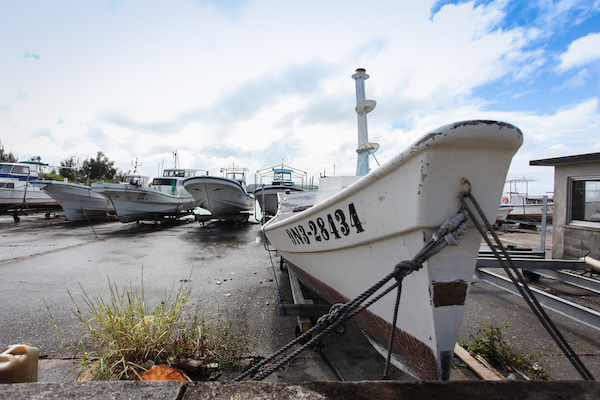

In [22]:
# 在 IPython 状态下显示图片 
# 使用 IDLE 或者其他python 运行环境的可以用电脑自带的程序检查图片

from IPython.display import Image as img
img(filename='test.jpg') 

In [1]:
# 生成缩略图

from PIL import Image

# 设定缩略图大小
size = (100, 100)

try:
    # 打开图片
    img = Image.open('test.jpg')
    # 生成缩略图
    img.thumbnail(size)
    # 保存缩略图图片
    img.save('test_thumbnail.jpg', 'JPEG')
    print('create thumbnail ok')
except IOError:
    print('cannot create thumbnail for')

create thumbnail ok


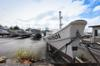

In [2]:
from IPython.display import Image as img
img(filename='test_thumbnail.jpg')

In [3]:
# 裁剪图片

from PIL import Image

# 设定裁剪的大小
box = (0, 0, 200, 200)

try:
    img = Image.open('test.jpg')
    # 生成裁剪图片
    region = img.crop(box)
    region.save('test_crop.jpg', 'JPEG')
    print('crop image ok')
except:
    print('something wrong')

crop image ok


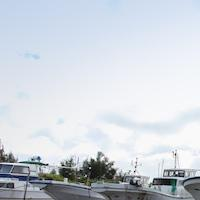

In [4]:
from IPython.display import Image as img
img(filename='test_crop.jpg')

In [11]:
from PIL import Image

img = Image.open('test.jpg')
img2 = img.rotate(360)
img2.save('test_rotate.jpg', 'JPEG')
print('rotate image ok')

rotate image ok


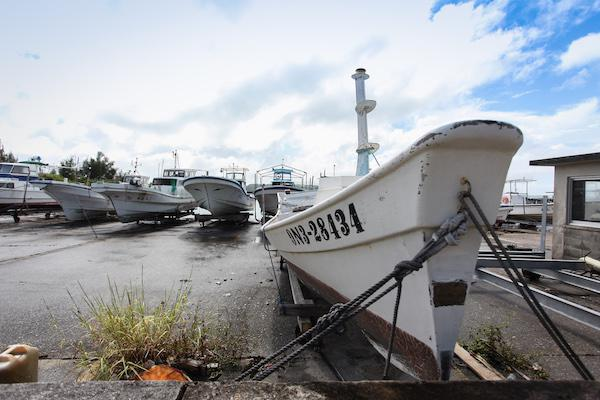

In [12]:
from IPython.display import Image as img
img(filename='test_rotate.jpg')

---

也可以用如下方法，进行图片的旋转等处理

```python
out = im.transpose(Image.FLIP_LEFT_RIGHT)
out = im.transpose(Image.FLIP_TOP_BOTTOM)
out = im.transpose(Image.ROTATE_90)
out = im.transpose(Image.ROTATE_180)
out = im.transpose(Image.ROTATE_270)
```



In [22]:
# 增强图片效果

from PIL import Image
from PIL import ImageEnhance

img = Image.open('test.jpg')
enh = ImageEnhance.Color(img)
img2 = enh.enhance(0.1)
img2.save('test_enhance.jpg', 'JPEG')
print('enhance crop image ok')

enhance crop image ok


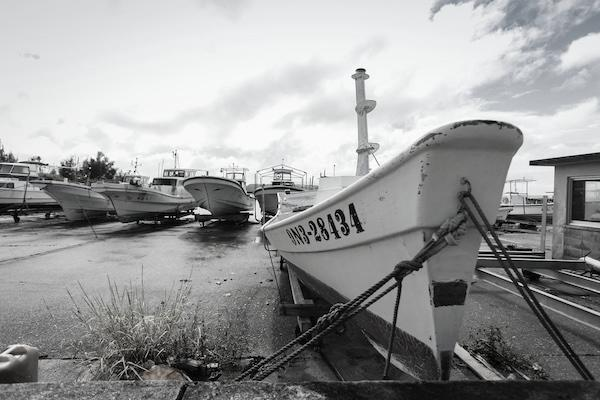

In [23]:
from IPython.display import Image as img
img(filename='test_enhance.jpg')

---

##### 增强效果方法列表

class PIL.ImageEnhance.Color(image) 调整图片的颜色

该类可以用于以类似于彩色电视机上的控件的方式调整图像的色彩平衡，增强因子为0.0给出黑白图像，因子1.0给出原始图像。

class PIL.ImageEnhance.Contrast(image) 调整图像对比度

这个类可以用于控制图像的对比度，类似于电视机上的对比度控制，增强因子0.0给出实心灰色图像，因子1.0给出原始图像。

class PIL.ImageEnhance.Brightness(image) 调整图像亮度
Adjust image brightness.

这个类可以用来控制图像的亮度，增强因子0.0给出黑色图像，因子1.0给出原始图像。

class PIL.ImageEnhance.Sharpness(image) 调整图像锐度

此类可用于调整图像的锐度，增强因子0.0给出模糊图像，因子1.0给出原始图像，因子2.0给出锐化图像。


In [46]:
# 读取照片

# 导入 PIL 的 Image 模块
from PIL import Image
# 打开一个图片文件
img = Image.open('test.jpg')
print(img.format, img.size, img.mode)

JPEG (600, 400) RGB


---

Mode 的解释

图像的模式定义图像中像素的类型和深度，s当前版本支持以下标准模式：

```
1 (1-bit pixels, black and white, stored with one pixel per byte)
L (8-bit pixels, black and white)
P (8-bit pixels, mapped to any other mode using a color palette)
RGB (3x8-bit pixels, true color)
RGBA (4x8-bit pixels, true color with transparency mask)
CMYK (4x8-bit pixels, color separation)
YCbCr (3x8-bit pixels, color video format)
Note that this refers to the JPEG, and not the ITU-R BT.2020, standard
LAB (3x8-bit pixels, the L*a*b color space)
HSV (3x8-bit pixels, Hue, Saturation, Value color space)
I (32-bit signed integer pixels)
F (32-bit floating point pixels)
```

In [47]:
# 读取照片

# 导入 PIL 的 Image 模块
from PIL import Image
# 打开一个图片文件
img = Image.open('test.jpg')

# 显示照片的信息，存在一个字典变量中
print(img.info)

{'jfif': 257, 'jfif_unit': 0, 'exif': b'Exif\x00\x00MM\x00*\x00\x00\x00\x08\x00\t\x01\x0f\x00\x02\x00\x00\x00\x06\x00\x00\x00z\x01\x10\x00\x02\x00\x00\x00\x15\x00\x00\x00\x80\x01\x12\x00\x03\x00\x00\x00\x01\x00\x01\x00\x00\x01\x1a\x00\x05\x00\x00\x00\x01\x00\x00\x00\x96\x01\x1b\x00\x05\x00\x00\x00\x01\x00\x00\x00\x9e\x01(\x00\x03\x00\x00\x00\x01\x00\x02\x00\x00\x011\x00\x02\x00\x00\x00*\x00\x00\x00\xa6\x012\x00\x02\x00\x00\x00\x14\x00\x00\x00\xd0\x87i\x00\x04\x00\x00\x00\x01\x00\x00\x00\xe4\x00\x00\x00\x00Canon\x00Canon EOS 5D Mark II\x00\x00\x00\x00\x00\xf0\x00\x00\x00\x01\x00\x00\x00\xf0\x00\x00\x00\x01Adobe Photoshop Lightroom 6.7 (Macintosh)\x002016:10:05 22:15:40\x00\x00\x1d\x82\x9a\x00\x05\x00\x00\x00\x01\x00\x00\x02F\x82\x9d\x00\x05\x00\x00\x00\x01\x00\x00\x02N\x88"\x00\x03\x00\x00\x00\x01\x00\x01\x00\x00\x88\'\x00\x03\x00\x00\x00\x01\x00d\x00\x00\x90\x00\x00\x07\x00\x00\x00\x040230\x90\x03\x00\x02\x00\x00\x00\x14\x00\x00\x02V\x90\x04\x00\x02\x00\x00\x00\x14\x00\x00\x02j\x92\x01

In [5]:
# 在图片上画线

from PIL import Image, ImageDraw

img = Image.open("test.jpg")

draw = ImageDraw.Draw(img)
draw.line((0, 0) + img.size, fill=128)
draw.line((0, img.size[1], img.size[0], 0), fill=128)
del draw

# write to stdout
img.save('test_draw.jpg', 'JPEG')
print('draw image ok')

draw image ok


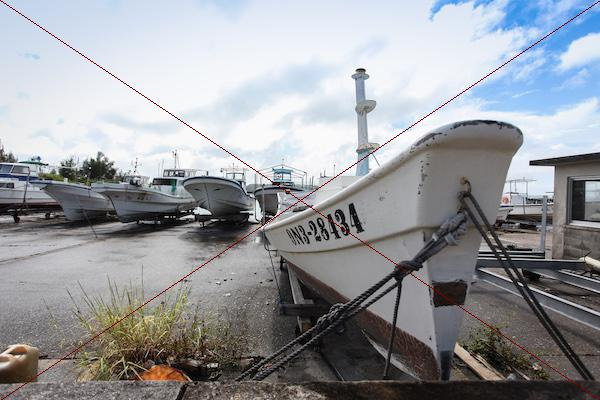

In [6]:
from IPython.display import Image as img
img(filename='test_draw.jpg')

In [26]:
# 图片滤镜效果，模糊

from PIL import Image, ImageFilter

img = Image.open("test.jpg")

img2 = img.filter(ImageFilter.BLUR)

img2.save('test_blur.jpg', 'JPEG')
print('blur image ok')

blur image ok


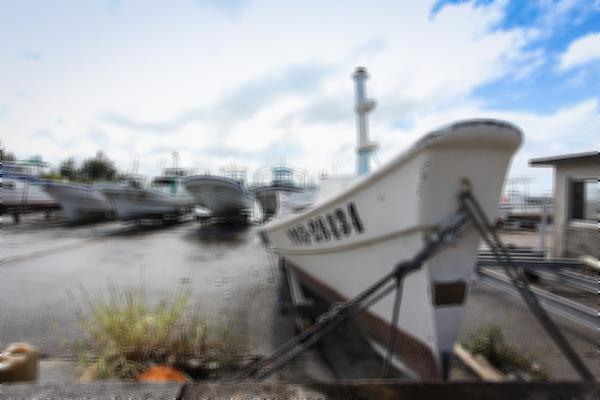

In [27]:
from IPython.display import Image as img
img(filename='test_blur.jpg')

---

Filters
滤镜的效果有下面这些

```
BLUR
CONTOUR
DETAIL
EDGE_ENHANCE
EDGE_ENHANCE_MORE
EMBOSS
FIND_EDGES
SMOOTH
SMOOTH_MORE
SHARPEN
```

In [60]:
# 图片滤镜效果，边缘强化

from PIL import Image, ImageFilter

img = Image.open("test.jpg")

img2 = img.filter(ImageFilter.FIND_EDGES)

img2.save('test_edge.jpg', 'JPEG')
print('edge image ok')

edge image ok


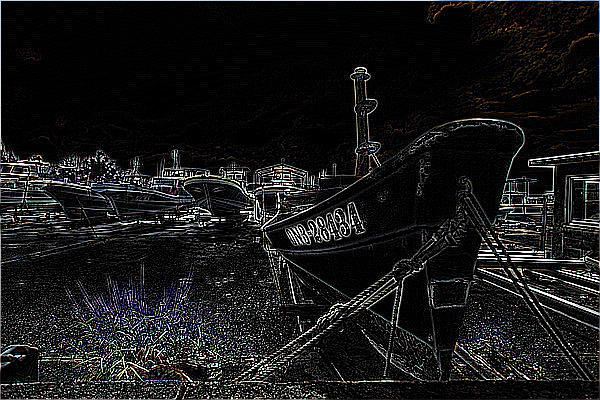

In [61]:
from IPython.display import Image as img
img(filename='test_edge.jpg')

---

### python 中的函数式编程

* 将函数作为值返回
* 高阶函数 map/reduce filter sorted
* 匿名函数
* 偏函数

##### 将函数作为值返回

函数除了返回值以外，还可以把函数作为结果值返回。


In [4]:
def lazy_sum(*args):
    
    def sum():
        ax = 0
        for n in args:
            ax = ax + n
        return ax
    
    return sum

f = lazy_sum(1, 3, 5, 7, 9)
print(f())

25


---

在这个例子中，我们在函数 lazy_sum 中又定义了函数 sum，并且，内部函数 sum 可以引用外部函数 lazy_sum 的参数和局部变量，当 lazy_sum 返回函数 sum 时，相关参数和变量都保存在返回的函数中，这种称为“闭包（Closure）”。

一个函数可以返回一个计算结果，也可以返回一个函数。

返回一个函数时，牢记该函数并未执行，返回函数中不要引用任何可能会变化的变量。

##### 偏函数

Python的functools模块提供了很多有用的功能，其中一个就是偏函数（Partial function）。要注意，这里的偏函数和数学意义上的偏函数不一样。

在介绍函数参数的时候，我们讲到，通过设定参数的默认值，可以降低函数调用的难度。而偏函数也可以做到这一点。

In [10]:
# 进制转换函数

print(int(12345))
print(int('1000',base=2))
print(int('1A',base=16))

12345
8
26


虽然默认参数还是很容易使用，但是如果我们在某个场景需要大量调用的话，还是有点方便，特别是对于有很多参数的函数来说，会让程序先的复杂。还记得之前那个 max min 的程序么？

In [12]:
import functools

int2 = functools.partial(int, base=2)

print(int2('1000000'))
print(int2('1010101'))

64
85


In [22]:
# 偏函数举例

def func(x=2,y=3,z=4):
    return x+y+z

print(func(x=3))
print(func(y=6))
print(func(x=4,y=10))
print(func(2,3))

10
12
18
9


In [27]:
import functools

f1 = functools.partial(func, z=2)
print(f1(2,3))
print(f1(2))
print(f1(2,3,4)) # 会报错，不需要再输入 z 的值

7
7


TypeError: func() got multiple values for argument 'z'

In [29]:
# 思考一下

a = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
print(a[1])
print(a[-1])

1
10


In [31]:
print(a[::2])
print(a[::-2])

[0, 2, 4, 6, 8, 10]
[10, 8, 6, 4, 2, 0]


In [28]:
a = ['a', 'b', 'ab', 'abcd']
print("".join(a))
print("-".join(a))


abababcd
a-b-ab-abcd
